In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import os

In [4]:
import numpy as np
import pandas as pd

In [5]:
from IPython.display import display

In [6]:
PROJECT_PATH = '/data/kireev-ia/data_open_ds/data-like-tinkoff-2019/'

In [7]:
!ls $PROJECT_PATH

customer_test.csv	    tinkoff_all_vectors.pickle
customer_train.csv	    TinkoffDataView.ipynb
Hack_desc.xlsx		    Tinkoff_Metric_Learning-Copy1.ipynb
sample_submit.csv	    Tinkoff_Metric_Learning.ipynb
stories_description.csv     tinkoff_trx.p
stories_reaction_test.csv   transactions.csv
stories_reaction_train.csv


# customer

In [8]:
df_cust_train = pd.read_csv(PROJECT_PATH + 'customer_train.csv')
df_cust_train.head()

,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,894436,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,30.0,MAR,0.0,2018-03-20 09:10:16,1,Неруководящий сотрудник - обсл. Персонал
1,524526,NaN,UTL,NaN,NaN,NaN,UTL,NaN,F,20.0,UNM,0.0,2017-03-29 20:38:45,16,NaN
2,498134,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,25.0,UNM,0.0,2018-03-12 11:25:06,22,NaN
3,278941,NaN,NaN,UTL,CLS,NaN,UTL,UTL,M,25.0,NaN,NaN,2016-02-21 18:47:51,16,Неруководящий сотрудник - специалист
4,877312,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,40.0,MAR,0.0,2018-03-07 11:17:02,22,NaN


In [9]:
df_cust_valid = pd.read_csv(PROJECT_PATH + 'customer_test.csv')
df_cust_valid.head()

,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,234305,NaN,NaN,NaN,NaN,NaN,UTL,NaN,F,25.0,NaN,0.0,2015-10-29 09:59:10,22,Менеджер проектов
1,914339,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,15.0,NaN,0.0,2018-04-09 08:51:54,22,NaN
2,895631,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,20.0,NaN,0.0,2018-03-22 10:38:33,16,Менеджер по продажам
3,954837,NaN,NaN,NaN,NaN,NaN,UTL,NaN,F,25.0,NaN,0.0,2018-05-09 18:24:32,16,Инженер
4,391590,NaN,UTL,NaN,NaN,NaN,NaN,NaN,M,30.0,UNM,0.0,2016-10-08 05:29:20,20,сборщик мебели


# stories_reaction

In [10]:
df_user_item_train = pd.read_csv(PROJECT_PATH + 'stories_reaction_train.csv')
df_user_item_train.head()

,customer_id,story_id,event_dttm,event
0,15,138,2018-07-24 15:33:22,view
1,15,202,2018-06-04 08:08:08,skip
2,15,222,2018-06-17 13:44:45,skip
3,15,379,2018-05-23 05:41:43,skip
4,15,544,2018-07-25 02:16:29,view


In [11]:
df_user_item_valid = pd.read_csv(PROJECT_PATH + 'stories_reaction_test.csv')
df_user_item_valid.head()

,customer_id,story_id,event_dttm,answer_id
0,466906,1152,2018-08-01 00:00:46,0
1,466906,1355,2018-08-01 00:00:46,1
2,146395,537,2018-08-01 00:02:08,2
3,897303,915,2018-08-01 00:02:30,3
4,50094,1415,2018-08-01 00:03:13,4


In [12]:
df_user_item_train['event_dttm'] = pd.to_datetime(df_user_item_train['event_dttm'])
df_user_item_valid['event_dttm'] = pd.to_datetime(df_user_item_valid['event_dttm'])

In [13]:
df_user_item_train['event_dttm'].agg(['min', 'max'])

min   2018-03-29 11:30:44
max   2018-07-31 23:58:14
Name: event_dttm, dtype: datetime64[ns]

In [14]:
df_user_item_valid['event_dttm'].agg(['min', 'max'])

min   2018-08-01 00:00:46
max   2018-08-22 20:49:33
Name: event_dttm, dtype: datetime64[ns]

In [15]:
def plot_dates(s_dt):
    s = s_dt.dt.floor('D')
    s = s - pd.to_timedelta(s.dt.day - 1, 'D')
    s = s.value_counts()
    return s

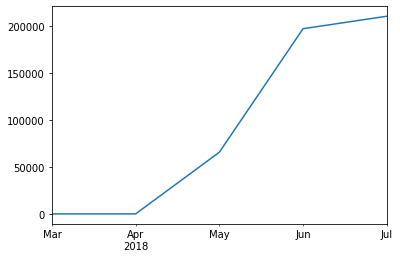

In [16]:
plot_dates(df_user_item_train['event_dttm']).plot()

In [17]:
plot_dates(df_user_item_valid['event_dttm'])

2018-08-01    172049
Name: event_dttm, dtype: int64

In [18]:
len(df_user_item_train) / (len(df_user_item_train) + len(df_user_item_valid))

0.7333359165517135

In [19]:
df_user_item_train = df_user_item_train.sort_values('event_dttm')

In [20]:
split_pos = int(len(df_user_item_train) * 0.75)
df_user_item_train, df_user_item_test = df_user_item_train.iloc[:split_pos], df_user_item_train.iloc[split_pos:]

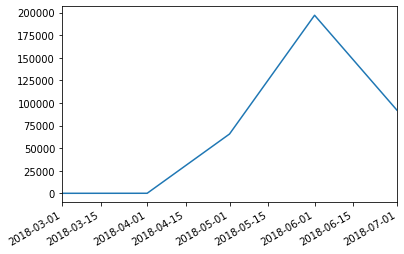

In [21]:
plot_dates(df_user_item_train['event_dttm']).plot()

In [22]:
plot_dates(df_user_item_test['event_dttm'])

2018-07-01    118286
Name: event_dttm, dtype: int64

# transactions

In [23]:
df_trans = pd.read_csv(PROJECT_PATH + 'transactions.csv')
df_trans.head()

,customer_id,transaction_month,transaction_day,transaction_amt,merchant_id,merchant_mcc
0,855115,7,3,1500,4554547,5411
1,997036,6,6,0,1657528,5411
2,398237,5,24,2500,26375569,5813
3,997036,6,2,0,16304402,5411
4,291636,7,25,0,1259505,5411


In [24]:
df_trans['customer_id'].nunique()

46948

# stories_description

In [25]:
df_stories = pd.read_csv(PROJECT_PATH + 'stories_description.csv')
df_stories.head()

,story_id,story_json
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""..."
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""..."
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""..."
3,1491,"{""guid"":""5f4a9215-01de-4777-b70f-a18899db8f1c""..."
4,598,"{""guid"":""ed8754bd-67be-4fa1-9289-5508d96f1fa4""..."


# Baseline

In [26]:
df_event_weights = pd.Series({
    'dislike': -10,
    'skip': -0.1,
    'view': 0.1,
    'like': 0.5,
})
df_event_weights

dislike   -10.0
skip       -0.1
view        0.1
like        0.5
dtype: float64

In [27]:
def tinkoff_metric(df):
    s_event_weights = df['event'].map(df_event_weights)
    res = s_event_weights * df['score']
    return res.mean()

## Const

In [28]:
df_test_predict = df_user_item_test.copy()
df_test_predict['score'] = -1

In [29]:
tinkoff_metric(df_test_predict)

0.057477638942901095

## Polular features

In [30]:
# fit default_value
s_default_reaction_proba = df_user_item_train.groupby('event')['customer_id'].count() / len(df_user_item_train)
s_default_reaction_proba

event
dislike    0.014606
like       0.132426
skip       0.353203
view       0.499765
Name: customer_id, dtype: float64

In [78]:
# fit users
df_user_reaction_proba = df_user_item_train \
    [lambda x: x['customer_id'].isin(
        df_user_item_train.groupby('customer_id')['event_dttm'].count()[lambda x: x > 3].index)] \
    .pivot_table(
        index='customer_id', columns='event',
        values='story_id', aggfunc='count', fill_value=0)

df_user_reaction_proba = df_user_reaction_proba + s_default_reaction_proba
df_user_reaction_proba = df_user_reaction_proba.div(df_user_reaction_proba.sum(axis=1), axis=0)

df_user_reaction_proba

event,dislike,like,skip,view
customer_id,,,,
15,0.000811,0.007357,0.408511,0.583320
73,0.001043,0.009459,0.810943,0.178555
129,0.000859,0.007790,0.550188,0.441163
178,0.002434,0.022071,0.892201,0.083294
362,0.167478,0.007357,0.019622,0.805542
...,...,...,...,...
1034355,0.001217,0.011035,0.862767,0.124980
1040157,0.002434,0.022071,0.558867,0.416627
1042646,0.002434,0.022071,0.558867,0.416627


In [79]:
# fit items
df_item_reaction_proba = df_user_item_train \
    [lambda x: x['story_id'].isin(
        df_user_item_train.groupby('story_id')['event_dttm'].count()[lambda x: x > 3].index)] \
    .pivot_table(
        index='story_id', columns='event',
        values='customer_id', aggfunc='count', fill_value=0)

df_item_reaction_proba = df_item_reaction_proba + s_default_reaction_proba
df_item_reaction_proba = df_item_reaction_proba.div(df_item_reaction_proba.sum(axis=1), axis=0)

df_item_reaction_proba

event,dislike,like,skip,view
story_id,,,,
123,0.000016,0.000146,0.404152,0.595686
126,0.000022,0.000202,0.776112,0.223664
127,0.000221,0.002006,0.778079,0.219693
128,0.000019,0.000170,0.424073,0.575738
129,0.000044,0.000395,0.514487,0.485074
...,...,...,...,...
1100023,0.001043,0.009459,0.168086,0.821412
1100025,0.000974,0.008828,0.090214,0.899984
1100026,0.002921,0.026485,0.070641,0.899953


In [33]:
COLS_EVENT = ['dislike', 'like', 'skip', 'view']

In [41]:
df_amnt_agg = pd.concat([
    df_trans.groupby('customer_id')['transaction_amt'].agg(['count', 'sum', 'mean']),
    df_trans.groupby('customer_id')['transaction_amt'].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).unstack(),
], axis=1)

df_amnt_agg = np.log1p(df_amnt_agg) / 10

df_amnt_agg.head()

,count,sum,mean,0.1,0.25,0.5,0.75,0.9
customer_id,,,,,,,,
15,0.461512,1.461347,1.000834,0.621661,0.690875,0.782445,0.874050,1.026817
73,0.572359,1.395484,0.823479,0.000000,0.000000,0.621661,0.731389,0.866579
91,0.477912,1.295631,0.818590,0.000000,0.621661,0.690875,0.782445,0.908262
144,0.179176,0.851739,0.690875,0.530330,0.621661,0.621661,0.690875,0.769667
150,0.160944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
ix_mcc = df_trans['merchant_mcc'].value_counts().iloc[:127].index.tolist()

In [43]:
def norm_row(df):
    return df.div(df.sum(axis=1) + 1e-5, axis=0)

In [44]:
df_mcc_agg = df_trans \
    .assign(merchant_mcc=df_trans['merchant_mcc'].map({v: i + 1 for i, v in enumerate(ix_mcc)}).fillna(0))

df_mcc_agg = pd.concat([
    norm_row(df_mcc_agg.pivot_table(index='customer_id', columns='merchant_mcc',
                                    values='transaction_amt',aggfunc=['count']).fillna(0)),
    norm_row(df_mcc_agg.pivot_table(index='customer_id', columns='merchant_mcc',
                                    values='transaction_amt',aggfunc=['sum']).fillna(0)),
    norm_row(df_mcc_agg.pivot_table(index='customer_id', columns='merchant_mcc',
                                    values='transaction_amt',aggfunc=['std']).fillna(0)),
], axis=1)

df_mcc_agg.head()

count                                                    \
merchant_mcc     0.0       1.0       2.0       3.0       4.0       5.0     
customer_id                                                                
15            0.080000  0.260000  0.020000  0.080000  0.080000  0.000000   
73            0.019672  0.150820  0.026230  0.013115  0.036066  0.295082   
91            0.025424  0.152542  0.101695  0.016949  0.076271  0.025424   
144           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
150           0.000000  0.499999  0.000000  0.249999  0.000000  0.000000   

                                                     ...   std              \
merchant_mcc     6.0      7.0       8.0       9.0    ... 118.0 119.0 120.0   
customer_id                                          ...                     
15            0.000000  0.04000  0.030000  0.000000  ...   0.0   0.0   0.0   
73            0.016393  0.02623  0.009836  0.009836  ...   0.0   0.0   0.0   
91            0.144068  0.00000  0.000000  0.067797  ...   0.0   0.0   0.0   
144           0.000000  0.20000  0.399999  0.000000  ...   0.0   0.0   0.0   
150           0.000000  0.00000  0.249999  0.000000  ...   0.0   0.0   0.0   

                                                        
merchant_mcc 121.0 122.0 123.0 124.0 125.0 126.0 127.0  
customer_id                                             
15             0.0   0.0   0.0   0.0   0.0   0.0   0.0  
73             0.0   0.0   0.0   0.0   0.0   0.0   0.0  
91             0.0   0.0   0.0   0.0   0.0   0.0   0.0  
144            0.0   0.0   0.0   0.0   0.0   0.0   0.0  
150            0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 384 columns]

In [45]:
df_embeddings = pd.read_pickle(PROJECT_PATH + "tinkoff_all_vectors.pickle").set_index('customer_id')
df_embeddings.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v054,v055,v056,v057,v058,v059,v060,v061,v062,v063
customer_id,,,,,,,,,,,,,,,,,,,,,
15,0.045986,0.073066,-0.102657,-0.070000,-0.226388,0.021740,0.095810,0.140051,0.131922,-0.026116,...,-0.005688,0.162406,-0.067965,-0.040175,0.164212,-0.099997,0.077077,0.011274,-0.008279,-0.003820
73,0.154809,0.037429,-0.177134,-0.045597,-0.121371,-0.060306,0.174855,0.182637,0.093187,-0.010200,...,0.097886,0.177703,0.123618,-0.145646,0.152623,-0.057651,0.164589,-0.121165,-0.115062,-0.051746
91,0.014153,-0.048872,-0.187590,0.035219,-0.189449,0.017896,0.180154,-0.005428,0.079310,0.065733,...,0.105551,0.161654,-0.068084,-0.094257,0.150516,-0.059367,-0.019642,-0.059673,-0.019760,0.078213
144,0.003958,0.175994,-0.069661,0.079811,-0.202884,-0.170080,0.166775,0.042914,0.159432,-0.060284,...,0.018247,0.256953,-0.035306,-0.055328,0.184141,-0.125160,-0.011663,-0.024973,-0.033970,0.025868
150,-0.117107,0.131219,-0.116869,0.079403,-0.202366,0.062064,0.164296,0.051221,0.113916,0.027527,...,0.004127,0.177279,0.014191,-0.062098,0.028283,-0.136526,-0.015416,0.072359,-0.042742,0.024230


In [118]:
import re

In [86]:
df_stories

,story_id,story_json
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""..."
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""..."
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""..."
3,1491,"{""guid"":""5f4a9215-01de-4777-b70f-a18899db8f1c""..."
4,598,"{""guid"":""ed8754bd-67be-4fa1-9289-5508d96f1fa4""..."
...,...,...
954,882,"{""guid"":""15eebb21-5e66-4e04-bd89-7003b8a90e31""..."
955,1473,"{""guid"":""4f9261e5-b049-41bd-9817-cb678c536c88""..."
956,266,"{""guid"":""e98bd2c6-274c-4ce4-b137-2df085621388""..."
957,764,"{""guid"":""0bce8dea-18f4-4b52-a8c3-a049be1c9c4d""..."


In [134]:
df_stori_features = (np.log1p(df_stories.set_index('story_id')['story_json'].str.len()) / 10) \
    .rename('json_len').to_frame()
df_stori_features['word_count'] = df_stories.set_index('story_id')['story_json'].apply(
    lambda x: len(re.findall(r'[а-яА-Я]+', x))) / 400
    
df_stori_features

,json_len,word_count
story_id,,
127,0.946553,0.1125
254,0.944707,0.1000
865,1.035609,0.4850
1491,1.032430,0.5700
598,1.031012,0.4650
...,...,...
882,0.968689,0.1250
1473,0.966890,0.1550
266,0.974432,0.2000


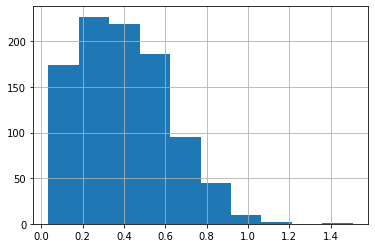

In [129]:
df_stori_features['word_count'].hist()

In [135]:
def make_features(df, use_amnt_agg=False, use_mcc_agg=False, use_embeddings=False):
    feature_list = [
        df_user_reaction_proba.reindex(index=df['customer_id'], columns=COLS_EVENT)
            .fillna(s_default_reaction_proba).values,
        np.log1p(df.groupby('customer_id')[['event']].count().reindex(index=df['customer_id'])
                 .fillna(0.0).values),
        df_item_reaction_proba.reindex(index=df['story_id'], columns=COLS_EVENT)
            .fillna(s_default_reaction_proba).values,
        np.log1p(df.groupby('story_id')[['event']].count().reindex(index=df['story_id'])
                 .fillna(0.0).values),
        df_stori_features.reindex(index=df['story_id'])
            .fillna({'json_len': 1.014882, 'word_count': 0.4}).values
    ]
    
    if use_amnt_agg:
        feature_list.append(
            df_amnt_agg.reindex(index=df['customer_id']).fillna(0.0).values)        
    
    if use_mcc_agg:
        feature_list.append(
            df_mcc_agg.reindex(index=df['customer_id']).fillna(0.0).values)
        
    if use_embeddings:
        feature_list.append(
            df_embeddings.reindex(index=df['customer_id']).fillna(0.0).values)
    
    X = np.concatenate(feature_list, axis=1)
    return X

In [101]:
y_train = df_user_item_train['event'].map({v: i for i, v in enumerate(COLS_EVENT)})
y_test = df_user_item_test['event'].map({v: i for i, v in enumerate(COLS_EVENT)})

In [48]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm

In [68]:
def roc_auc_mc_score(df):
    def pair_ranking_rate(df):
        events = df['event'].map({'dislike': 0, 'skip': 1, 'view': 2, 'like': 3}).values
        scores = df['score'].values
        mask = (np.sign(events.reshape(-1, 1) - events.reshape(1, -1)) > 0).astype(int)
        right_pairs = ((mask * np.sign(scores.reshape(-1, 1) - scores.reshape(1, -1))) > 0).astype(float)
        return right_pairs.sum() / mask.sum() if mask.sum() > 0 else np.NaN
    
    return df.groupby('customer_id').apply(pair_ranking_rate).mean()

In [69]:
def estimate_model_and_features(model):
    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)

    score1 = tinkoff_metric(df_user_item_test.assign(
        score=np.sign((predict * np.array([[-10, 0.5, -0.1, 0.1]])).sum(axis=1))))
    
    score2 = roc_auc_mc_score(df_user_item_test.assign(
        score=(predict * np.array([[-10, 0.5, -0.1, 0.1]])).sum(axis=1)))
    print(f'{model.__class__.__name__:25s}: {score1:.4f}, {score2:.4f}') 

In [148]:
def estimate_model_and_features_ens(model):
    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 1, 'view': 1, 'like': 1}))
    predict1 = model.predict_proba(X_test)[:, 1]

    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 0, 'view': 1, 'like': 1}))
    predict2 = model.predict_proba(X_test)[:, 1]

    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 0, 'view': 0, 'like': 1}))
    predict3 = model.predict_proba(X_test)[:, 1]
    
    predict = (predict1 + 0.5 * predict2 + predict3)

    score2 = roc_auc_mc_score(df_user_item_test.assign(score=predict))
    print(f'{model.__class__.__name__:25s}: {score2:.4f}') 

# Base features

In [149]:
X_train = make_features(df_user_item_train)
X_test = make_features(df_user_item_test)
X_train.shape, X_test.shape

((354855, 12), (118286, 12))

In [150]:
%%time
estimate_model_and_features_ens(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features_ens(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features_ens(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features_ens(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : 0.5979
RandomForestClassifier   : 0.5956
LGBMClassifier           : 0.6127
CPU times: user 5min 40s, sys: 18.7 s, total: 5min 59s
Wall time: 2min 14s


In [151]:
def estimate_model_and_features_ens(model):
    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 1, 'view': 1, 'like': 1}))
    predict1 = model.predict_proba(X_test)[:, 1]

    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 0, 'view': 1, 'like': 1}))
    predict2 = model.predict_proba(X_test)[:, 1]

    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 0, 'view': 0, 'like': 1}))
    predict3 = model.predict_proba(X_test)[:, 1]
    
    predict = (predict1 + 2.0 * predict2 + predict3)

    score2 = roc_auc_mc_score(df_user_item_test.assign(score=predict))
    print(f'{model.__class__.__name__:25s}: {score2:.4f}') 

In [152]:
%%time
estimate_model_and_features_ens(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features_ens(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features_ens(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features_ens(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : 0.6071
RandomForestClassifier   : 0.6013
LGBMClassifier           : 0.6195
CPU times: user 5min 41s, sys: 18.6 s, total: 6min
Wall time: 2min 14s


In [155]:
def estimate_model_and_features_ens(model):
    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 1, 'view': 1, 'like': 1}))
    predict1_tr = model.predict_proba(X_train)[:, 1]
    predict1_ts = model.predict_proba(X_test)[:, 1]

    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 0, 'view': 1, 'like': 1}))
    predict2_tr = model.predict_proba(X_train)[:, 1]
    predict2_ts = model.predict_proba(X_test)[:, 1]

    model.fit(X_train, df_user_item_train['event'].map({'dislike': 0, 'skip': 0, 'view': 0, 'like': 1}))
    predict3_tr = model.predict_proba(X_train)[:, 1]
    predict3_ts = model.predict_proba(X_test)[:, 1]
    
    predict_tr = (predict1_tr + 10.0 * predict2_tr + 2 * predict3_tr)
    predict_ts = (predict1_ts + 10.0 * predict2_ts + 2 * predict3_ts)

    score_tr = roc_auc_mc_score(df_user_item_train.assign(score=predict_tr))
    score_ts = roc_auc_mc_score(df_user_item_test.assign(score=predict_ts))
    print(f'{model.__class__.__name__:25s}: train {score_tr:.4f}, test {score_ts:.4f}') 

In [156]:
%%time
estimate_model_and_features_ens(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features_ens(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features_ens(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features_ens(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : train 0.6549, test 0.6080
RandomForestClassifier   : train 0.8752, test 0.6032
LGBMClassifier           : train 0.7021, test 0.6206
CPU times: user 8min 34s, sys: 23.9 s, total: 8min 58s
Wall time: 4min 23s


In [141]:
%%time
estimate_model_and_features_ens(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features_ens(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features_ens(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features_ens(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : 0.6061
RandomForestClassifier   : 0.6005
LGBMClassifier           : 0.6163
CPU times: user 6min 2s, sys: 29 s, total: 6min 31s
Wall time: 2min 25s


In [71]:
%%time
estimate_model_and_features(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : 0.1014, 0.5891
RandomForestClassifier   : 0.0853, 0.5354
LGBMClassifier           : 0.0794, 0.5674
CPU times: user 4min, sys: 14.5 s, total: 4min 15s
Wall time: 1min 54s


# use_amnt_agg features

In [142]:
X_train = make_features(df_user_item_train, use_amnt_agg=True)
X_test = make_features(df_user_item_test, use_amnt_agg=True)
X_train.shape, X_test.shape

((354855, 20), (118286, 20))

In [143]:
%%time
estimate_model_and_features_ens(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features_ens(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features_ens(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features_ens(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : 0.6069
RandomForestClassifier   : 0.5976
LGBMClassifier           : 0.6172
CPU times: user 7min 34s, sys: 51.8 s, total: 8min 26s
Wall time: 3min 10s


# use_mcc_agg features

In [144]:
X_train = make_features(df_user_item_train, use_mcc_agg=True)
X_test = make_features(df_user_item_test, use_mcc_agg=True)
X_train.shape, X_test.shape

((354855, 396), (118286, 396))

In [145]:
%%time
estimate_model_and_features_ens(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features_ens(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features_ens(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features_ens(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : 0.6078
RandomForestClassifier   : 0.5953
LGBMClassifier           : 0.6140
CPU times: user 25min 4s, sys: 2min 2s, total: 27min 7s
Wall time: 9min 1s


# use_embeddings features

In [146]:
X_train = make_features(df_user_item_train, use_embeddings=True)
X_test = make_features(df_user_item_test, use_embeddings=True)
X_train.shape, X_test.shape

((354855, 76), (118286, 76))

In [147]:
%%time
estimate_model_and_features_ens(LogisticRegression(solver='liblinear', multi_class='ovr'))
estimate_model_and_features_ens(RandomForestClassifier(n_estimators=100, n_jobs=4))
# estimate_model_and_features_ens(xgb.XGBClassifier(n_estimators=300, n_jobs=4))
estimate_model_and_features_ens(lightgbm.LGBMClassifier(n_estimators=300, n_jobs=4))

LogisticRegression       : 0.6062
RandomForestClassifier   : 0.5989
LGBMClassifier           : 0.6165
CPU times: user 20min 57s, sys: 56.9 s, total: 21min 54s
Wall time: 6min 55s
